# Librerías

In [1]:
import pandas as pd
import sys
from datetime import datetime, timedelta
import pytz

sys.path.append('/home/marta/Desktop/IH/Shkrappy/src')
from fun import *

# Importar datos

In [2]:
# Scrapeo de reddit:

memes = pd.read_csv('../data/raw_data/reddit/memes.csv')
programming = pd.read_csv('../data/raw_data/reddit/programming.csv')
science = pd.read_csv('../data/raw_data/reddit/science.csv')
relationships = pd.read_csv('../data/raw_data/reddit/relationships.csv')
usa = pd.read_csv('../data/raw_data/reddit/usa.csv')
canada = pd.read_csv('../data/raw_data/reddit/canada.csv')
uk = pd.read_csv('../data/raw_data/reddit/uk.csv')


# Datos de uso por país:

georeddit = pd.read_csv('../data/raw_data/semrush/redditusage.csv')

# Datos de Google Trends:

g_usa = pd.read_csv('../data/raw_data/google_trends/googleUSA.csv')
g_canada = pd.read_csv('../data/raw_data/google_trends/googleCanada.csv')
g_uk = pd.read_csv('../data/raw_data/google_trends/googleUK.csv')


# 3.1. Procesado y limpieza

Antes de subir las tablas a la base de datos, vamos a limpiarlas y prepararlas para poder obtener información útil de ellas. 



# Tablas de reddit

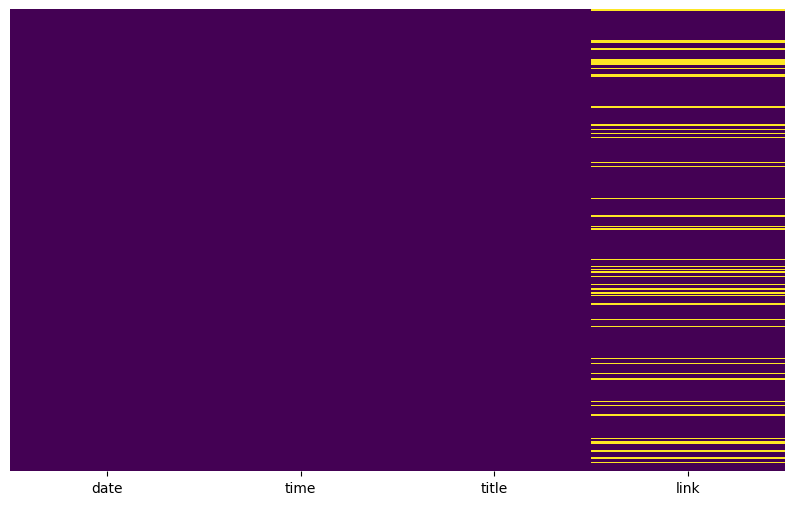

In [3]:
# Vamos a empezar deshaciéndonos de los nulos, que ya vimos que solo estaban en la columna de 'link' de imagen.

nanplot(usa)

In [4]:
# En el caso de los memes, simplemente tiraremos las filas que tengan nula esa columna ya que son pocos y no nos 
# interesan sin imagen.

print(memes.isna().sum())

memes.dropna(inplace = True)

date     0
time     0
title    0
link     5
dtype: int64


In [5]:
# En el caso del resto, los rellenaremos con la string 'no_image'

programming.fillna('no_image', inplace = True)
science.fillna('no_image', inplace = True)
relationships.fillna('no_image', inplace = True)
usa.fillna('no_image', inplace = True)
canada.fillna('no_image', inplace = True)
uk.fillna('no_image', inplace = True)

In [6]:
# Nulos gestionados, vamos a la siguiente cuestión. Cada scrapeo nos ha dado un número de registros diferente y un
# rango temporal distinto:

memes.shape[0], programming.shape[0], science.shape[0], relationships.shape[0], usa.shape[0], canada.shape[0], uk.shape[0]

(427, 383, 450, 465, 333, 479, 471)

In [7]:
# Lo que nos interesa de estos datos es compararlos dentro de un rango temporal concreto, por lo que veremos cuál
# es el más corto de los 5 sets y nos quedaremos solo con los registros dentro de ese margen:

oldest = [min(memes.date), min(programming.date), min(science.date), 
          min(relationships.date), min(usa.date), min(canada.date), min(uk.date)]

oldest

['2023-07-31',
 '2023-07-26',
 '2023-07-16',
 '2023-08-02',
 '2023-07-26',
 '2023-07-25',
 '2023-07-22']

In [8]:
cutdate1 = max(oldest) # Todos los registros más antiguos que esta fecha se irán fuera

cutdate1

'2023-08-02'

In [9]:
memes.drop(index = memes[memes.date < cutdate1].index, inplace = True)
programming.drop(index = programming[programming.date < cutdate1].index, inplace = True)
science.drop(index = science[science.date < cutdate1].index, inplace = True)
relationships.drop(index = relationships[relationships.date < cutdate1].index, inplace = True)
usa.drop(index = usa[usa.date < cutdate1].index, inplace = True)
canada.drop(index = canada[canada.date < cutdate1].index, inplace = True)
uk.drop(index = uk[uk.date < cutdate1].index, inplace = True)

In [10]:
memes.shape[0], programming.shape[0], science.shape[0], relationships.shape[0], usa.shape[0], canada.shape[0], uk.shape[0]

# Hemos hecho una buena limpia, parece que de los 5 subreddits el de relationships es el más activo.

(194, 151, 89, 465, 137, 172, 143)

In [11]:
relationships.tail() 
# El registro más antiguo de relationhsips data de las 15:30 de la tarde más o menos.
# Eliminemos también los registros anteriores a esa hora en todos los dataframes.

,date,time,title
460,2023-08-02,16:11:37,Is my best friend a hypocrite?
461,2023-08-02,16:08:02,Me (22M) and my girlfriend (20F) have a very d...
462,2023-08-02,15:24:36,Girl(25f) I’ve(25m) been seeing for 7 months d...
463,2023-08-02,15:23:07,I (16m) have experienced a lack of romantic in...
464,2023-08-02,15:21:46,Me 32 yo female have a bad feeling my 32 yo bf...


In [12]:
cuthour1 = '15:30:00'

memes.drop(index = memes[(memes.date == max(oldest)) & (memes.time < cuthour1)]\
        .index, inplace = True)
programming.drop(index = programming[(programming.date == max(oldest)) & (programming.time < cuthour1)]\
        .index, inplace = True)
science.drop(index = science[(science.date == max(oldest)) & (science.time < cuthour1)]\
        .index, inplace = True)
relationships.drop(index = relationships[(relationships.date == max(oldest)) & (relationships.time < cuthour1)]\
        .index, inplace = True)
usa.drop(index = usa[(usa.date == max(oldest)) & (usa.time < cuthour1)]\
        .index, inplace = True)
canada.drop(index = canada[(canada.date == max(oldest)) & (canada.time < cuthour1)]\
        .index, inplace = True)
uk.drop(index = uk[(uk.date == max(oldest)) & (uk.time < cuthour1)]\
        .index, inplace = True)

In [13]:
memes.shape[0], programming.shape[0], science.shape[0], relationships.shape[0], usa.shape[0], canada.shape[0], uk.shape[0]

# Listo, rango temporal cuadrado

(167, 135, 69, 462, 122, 152, 117)

In [14]:
# Guardemos también la hora superior de los registros. Según el subreddit más activo, relationships, la hora
# tope son cerca de las 18:30, así que nos quedaremos con ese dato y con la fecha más reciente:

cuthour2 = '18:30:00'
cutdate2 = relationships.loc[0,'date']

relationships.head()

,date,time,title
0,2023-08-05,18:44:58,How to ask new roommates to organize more
1,2023-08-05,18:30:59,My (m27) friends said that my gf (f21) kissed ...
2,2023-08-05,18:30:13,I (26f) feeling hurt and used by (27M) and wan...
3,2023-08-05,18:26:54,I’ve failed as a husband.
4,2023-08-05,18:25:24,Am I unjustified in getting my feelings hurt?


# Tablas de google trends

In [15]:
# Estas tablas tienen todas las mismas dimensiones y no tienen nulos.

g_usa.shape[0], g_canada.shape[0], g_uk.shape[0]

(169, 169, 169)

In [16]:
# Antes de seguir con ellas vamos a modificar su estructura de títulos, que es un poco rara:

g_uk.head()

,Categoría: Noticias locales
Tiempo,Geo: Inglaterra
2023-07-29T22,69
2023-07-29T23,67
2023-07-30T00,53
2023-07-30T01,36


In [17]:
# Los datos temporales están puestos como índice. Hacemos un reset_index sin drop para conservar la columna,
# y cambiamos los nombres:

col_names = ['datetime','activity']


g_uk.drop(index = 'Tiempo', inplace = True) # Quitamos la primera entrada que no tiene datos
g_uk.reset_index(inplace = True)
g_canada.drop(index = 'Tiempo', inplace = True) 
g_canada.reset_index(inplace = True)
g_usa.drop(index = 'Tiempo', inplace = True) 
g_usa.reset_index(inplace = True)

g_uk.columns = col_names
g_canada.columns = col_names
g_usa.columns = col_names

g_uk.head()

,datetime,activity
0,2023-07-29T22,69
1,2023-07-29T23,67
2,2023-07-30T00,53
3,2023-07-30T01,36
4,2023-07-30T02,25


In [18]:
# Mucho mejor. Lo siguiente sería separar el dato temporal en día y hora, pero antes vamos a transformar el dato a
# la hora internacional UTC que es en la que están los registros de los posts. Lo haremos con una función local:

spaintime = pytz.timezone('Europe/Madrid')
g_uk.datetime = g_uk.datetime.apply(lambda x: spaintime.localize(pd.to_datetime(x)).astimezone(pytz.utc))
g_canada.datetime = g_canada.datetime.apply(lambda x: spaintime.localize(pd.to_datetime(x)).astimezone(pytz.utc))
g_usa.datetime = g_usa.datetime.apply(lambda x: spaintime.localize(pd.to_datetime(x)).astimezone(pytz.utc))

g_uk.head()

,datetime,activity
0,2023-07-29 20:00:00+00:00,69
1,2023-07-29 21:00:00+00:00,67
2,2023-07-29 22:00:00+00:00,53
3,2023-07-29 23:00:00+00:00,36
4,2023-07-30 00:00:00+00:00,25


In [19]:
# Es verdad que hubiera bastado con restar dos horas a todo, pero bueh. No está de más saber que existe esta
# herramienta. Separemos en fecha y hora:

g_uk['date'] = g_uk.datetime.apply(lambda x: str(x.date()))
g_uk['time'] = g_uk.datetime.apply(lambda x: str(x.time()))
g_uk.drop(columns = 'datetime', inplace = True)
g_canada['date'] = g_canada.datetime.apply(lambda x: str(x.date()))
g_canada['time'] = g_canada.datetime.apply(lambda x: str(x.time()))
g_canada.drop(columns = 'datetime', inplace = True)
g_usa['date'] = g_usa.datetime.apply(lambda x: str(x.date()))
g_usa['time'] = g_usa.datetime.apply(lambda x: str(x.time()))
g_usa.drop(columns = 'datetime', inplace = True)

g_uk.head() # Mejor

,activity,date,time
0,69,2023-07-29,20:00:00
1,67,2023-07-29,21:00:00
2,53,2023-07-29,22:00:00
3,36,2023-07-29,23:00:00
4,25,2023-07-30,00:00:00


In [20]:
# Reduciremos el rango temporal también, para poder comparar con los datos de los posts de reddit.

cuthour11 = '15:00:00'
cuthour22 = '19:00:00'

# Registros más antiguos:

g_uk.drop(index = g_uk[(g_uk.date < cutdate1)|((g_uk.date == cutdate1)&(g_uk.time < cuthour11))].index, inplace = True)
g_canada.drop(index = g_canada[(g_canada.date < cutdate1)|((g_canada.date == cutdate1)&(g_canada.time < cuthour11))].index, inplace = True)
g_usa.drop(index = g_usa[(g_usa.date < cutdate1)|((g_usa.date == cutdate1)&(g_usa.time < cuthour11))].index, inplace = True)


# Últimos registros:

g_uk.drop(index = g_uk[(g_uk.date == cutdate2)&(g_uk.time > cuthour22)].index, inplace = True)
g_canada.drop(index = g_canada[(g_canada.date == cutdate2)&(g_canada.time > cuthour22)].index, inplace = True)
g_usa.drop(index = g_usa[(g_usa.date == cutdate2)&(g_usa.time > cuthour22)].index, inplace = True)

# Reseteamos índices:

g_uk.reset_index(drop = True, inplace = True)
g_canada.reset_index(drop = True, inplace = True) 
g_usa.reset_index(drop = True, inplace = True) 

# Y cambiamos el orden de las columnas:

g_uk = g_uk.reindex(columns = ['date','time','activity'])
g_canada = g_canada.reindex(columns = ['date','time','activity'])
g_usa = g_usa.reindex(columns = ['date','time','activity'])

g_uk # Perfecto

,date,time,activity
0,2023-08-02,15:00:00,73
1,2023-08-02,16:00:00,71
2,2023-08-02,17:00:00,70
3,2023-08-02,18:00:00,71
4,2023-08-02,19:00:00,74
...,...,...,...
72,2023-08-05,15:00:00,67
73,2023-08-05,16:00:00,71
74,2023-08-05,17:00:00,68
75,2023-08-05,18:00:00,67


In [21]:
# Por último, volveremos a normalizar los datos, ya que estaban normalizados en un rango de 1 semana y ahora hemos 
# acortado el intervalo. Primero convertimos a enteros los valores de activity que están en formato string:

g_uk['activity'] = g_uk['activity'].apply(lambda x: int(x))
g_canada['activity'] = g_canada['activity'].apply(lambda x: int(x))
g_usa['activity'] = g_usa['activity'].apply(lambda x: int(x))


# Y ahora normalizamos:

g_uk['activity'] = g_uk['activity'].apply(lambda x: int(100*x/max(g_uk['activity'])))
g_canada['activity'] = g_canada['activity'].apply(lambda x: int(100*x/max(g_canada['activity'])))
g_usa['activity'] = g_usa['activity'].apply(lambda x: int(100*x/max(g_usa['activity'])))

g_uk # Hecho

,date,time,activity
0,2023-08-02,15:00:00,79
1,2023-08-02,16:00:00,77
2,2023-08-02,17:00:00,76
3,2023-08-02,18:00:00,77
4,2023-08-02,19:00:00,80
...,...,...,...
72,2023-08-05,15:00:00,72
73,2023-08-05,16:00:00,77
74,2023-08-05,17:00:00,73
75,2023-08-05,18:00:00,72


# Tabla de uso de reddit por países

In [22]:
georeddit # Limpérrima

,country,usage_percentage,users
0,United States,40.10,17700000000
1,Canada,6.25,2754000000
2,United Kingdom,5.68,2502000000
3,India,5.20,2291000000
4,Philippines,4.28,1886000000


# 3.2. Agrupación de los registros de reddit por intervalos de tiempo

Para poder comparar la información que hemos obtenido del scrapeo con la que tenemos de google trends, agruparemos los registros en intervalos de 1 hora. Para ello crearemos una nueva versión de cada tabla de reddit en que el índice será un objeto datetime con la hora de registro.

In [23]:
# Seguramente en Google Trends los intervalos sean entre las medias horas, es decir, 19:00 por ejemplo
# cubra los registros entre las 18:30 y las 19:30. Por ello pasaremos las horas a datetime y compararemos
# cada registro con una franja de +- 0.5 horas en torno a cada valor:

hours = sorted(list(pd.to_datetime(g_uk.time.unique())))
hours.append(hours[0])
days = sorted(list(g_uk.date.unique())) # Para los días no hace falta


# Podríamos hacerlo vía timestamps y volver a unir las columnas de fecha y hora en todos los dataframes, 
# pero me interesa que sean accesibles por separado y tampoco es difícil hacerlo de otra manera.

# Creamos una función de agrupación:

def timegroup(df):
    
    rows = []
    
    for i in days: # Por cada día distinto
        for j in range(len(hours)-1): # Y cada intervalo horario
            row = [i,str(hours[j].time()),df[(df.date == i)&\
                                 (df.time>str((hours[j]-timedelta(hours=0.5)).time()))&\
                                 (df.time<str((hours[j+1]+timedelta(hours=0.5)).time()))].shape[0]] # Contamos
            
            if str(row[0]) == cutdate1 and str(row[1]) < cuthour11 or str(row[0]) == cutdate2 and str(row[1]) > cuthour22: # Límites
                continue
            else:
                rows.append(row) # Si está dentro de las franjas que nos interesan, guardamos la fila
    
    return pd.DataFrame(rows)



In [24]:
# Veamos si funciona:

timegroup(relationships) # ¡Genial! Y tiene las mismas filas que las tablas de google trends, perfecto

,0,1,2
0,2023-08-02,15:00:00,8
1,2023-08-02,16:00:00,19
2,2023-08-02,17:00:00,17
3,2023-08-02,18:00:00,18
4,2023-08-02,19:00:00,19
...,...,...,...
72,2023-08-05,15:00:00,8
73,2023-08-05,16:00:00,17
74,2023-08-05,17:00:00,31
75,2023-08-05,18:00:00,21


Por último, para poder comparar con Google Trends necesitamos datos de actividad relativa. Normalizaremos
esta información dividiendo entre el máximo de cada tabla y multiplicando por 100, para lo que cambiaremos un 
poco la función anterior:

In [25]:
def timegroup(df):
    
    rows = []
    
    for i in days: 
        for j in range(len(hours)-1):
            row = [i,str(hours[j].time()),df[(df.date == i)&\
                                 (df.time>str((hours[j]-timedelta(hours=0.5)).time()))&\
                                 (df.time<str((hours[j+1]+timedelta(hours=0.5)).time()))].shape[0]]
            
            if str(row[0]) == cutdate1 and str(row[1]) < cuthour11 or str(row[0]) == cutdate2 and str(row[1]) > cuthour22: 
                continue
            else:
                rows.append(row)
    
    data = pd.DataFrame(rows)
    data[2] = data[2].apply(lambda x: int(100*x/max(data[2])))
    data.columns = ['date','time','activity']
    
    return data

In [26]:
timegroup(relationships) # Perfecto

,date,time,activity
0,2023-08-02,15:00:00,25
1,2023-08-02,16:00:00,61
2,2023-08-02,17:00:00,54
3,2023-08-02,18:00:00,58
4,2023-08-02,19:00:00,61
...,...,...,...
72,2023-08-05,15:00:00,25
73,2023-08-05,16:00:00,54
74,2023-08-05,17:00:00,100
75,2023-08-05,18:00:00,67


# 3.3. Tabla conjunta

Por último, juntaremos todos los dataframes en una única tabla para poder realizar análisis posteriores. 
El dataframe final tendrá la fecha, la franja horaria y la actividad por cada país como columnas.

In [27]:
activity = g_uk.copy()
activity.columns = ['date','time','g_uk']

activity['g_canada'] = g_canada['activity']
activity['g_usa'] = g_usa['activity']
activity['r_usa'] = timegroup(usa)['activity']
activity['r_canada'] = timegroup(canada)['activity']
activity['r_uk'] = timegroup(uk)['activity']
activity['r_relationships'] = timegroup(relationships)['activity']
activity['r_programming'] = timegroup(programming)['activity']
activity['r_memes'] = timegroup(memes)['activity']
activity['r_science'] = timegroup(science)['activity']

activity

,date,time,g_uk,g_canada,g_usa,r_usa,r_canada,r_uk,r_relationships,r_programming,r_memes,r_science
0,2023-08-02,15:00:00,79,61,62,6,50,25,25,45,33,40
1,2023-08-02,16:00:00,77,72,68,26,60,25,61,72,41,80
2,2023-08-02,17:00:00,76,70,65,26,40,0,54,45,25,80
3,2023-08-02,18:00:00,77,65,67,33,80,0,58,36,50,60
4,2023-08-02,19:00:00,80,72,79,26,70,0,61,27,50,20
...,...,...,...,...,...,...,...,...,...,...,...,...
72,2023-08-05,15:00:00,72,51,56,93,50,25,25,72,58,20
73,2023-08-05,16:00:00,77,51,56,13,40,37,54,63,66,20
74,2023-08-05,17:00:00,73,47,58,13,10,75,100,27,75,20
75,2023-08-05,18:00:00,72,52,57,26,10,75,67,9,50,0


# 3.4. Revisión de tipos de datos

Antes de guardar las tablas echaremos un último vistazo a los tipos de datos, para corregir detalles si es necesario.

In [28]:
# Está bien que todas las columnas de las tablas de los subrredits sean tipo object, 
# ya que lo único que podría cambiarse a datetime es la fecha y hora y nos interesa tenerla en columnas separadas
# para poder agrupar por horas etc.

memes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 170
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    167 non-null    object
 1   time    167 non-null    object
 2   title   167 non-null    object
 3   link    167 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [29]:
georeddit.info() # Todo bien.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           5 non-null      object 
 1   usage_percentage  5 non-null      float64
 2   users             5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [30]:
activity.info() # Y todo bien también.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             77 non-null     object
 1   time             77 non-null     object
 2   g_uk             77 non-null     int64 
 3   g_canada         77 non-null     int64 
 4   g_usa            77 non-null     int64 
 5   r_usa            77 non-null     int64 
 6   r_canada         77 non-null     int64 
 7   r_uk             77 non-null     int64 
 8   r_relationships  77 non-null     int64 
 9   r_programming    77 non-null     int64 
 10  r_memes          77 non-null     int64 
 11  r_science        77 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 7.3+ KB


# 3.5. Guardado de datos

Exportamos todas las tablas a csv y las preparamos para la subida a la base de datos. Las guardamos en una carpeta dentro de 'data' llamada 'clean_data'.

In [33]:
memes.to_csv('../data/clean_data/c_reddit_memes.csv', index = False)
programming.to_csv('../data/clean_data/c_reddit_programming.csv', index = False)
science.to_csv('../data/clean_data/c_reddit_science.csv', index = False)
relationships.to_csv('../data/clean_data/c_reddit_relationships.csv', index = False)
usa.to_csv('../data/clean_data/c_reddit_usa.csv', index = False)
canada.to_csv('../data/clean_data/c_reddit_canada.csv', index = False)
uk.to_csv('../data/clean_data/c_reddit_uk.csv', index = False)

georeddit.to_csv('../data/clean_data/c_georeddit.csv', index = False)

g_usa.to_csv('../data/clean_data/c_google_usa.csv', index = False)
g_canada.to_csv('../data/clean_data/c_google_canada.csv', index = False)
g_uk.to_csv('../data/clean_data/c_google_uk.csv', index = False)
activity.to_csv('../data/clean_data/c_activity.csv', index = False)